In [17]:
# import library
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np

In [18]:
# masukkan data ke dalam dataframe
df = pd.read_csv("qMahasiswa.csv")
df.tail()

,mahasiswaid,nopeserta,nama,tempatlahir,tgllahir,jk,agama,status,asalsekolah,kabkotasekolah,propinsi,thnlulus,fakultas,pekerjaanorgtua,kabkotaorgtua,propinsiorgtua,thnajaran
6462,6487,1999-43-2020,Irene Crysant Marta Marbun,Medan,2/13/2001,Pr,Protestan,Tidak Bekerja,SMU,Medan,Sumatera Utara,2020,Ekonomi,Lain-lain,Medan,Sumatera Utara,2020/2021
6463,6488,2002-11-2020,Jonny Fransisko Sirait,Kampung Baru,12/1/2000,Lk,Protestan,Tidak Bekerja,MAN,Simalungun,Sumatera Utara,2018,Sastra,Lain-lain,Simalungun,Sumatera Utara,2020/2021
6464,6489,2001-51-2020,Richi Ardian Sijabat,Parmahanan,6/30/1998,Lk,Protestan,Tidak Bekerja,SMU,Simalungun,Sumatera Utara,2017,Ilmu Komputer,Wiraswasta,Simalungun,Sumatera Utara,2020/2021
6465,6490,2003-51-2020,Reggy Arauna Aritonang,Medan,7/1/2003,Lk,Protestan,Tidak Bekerja,SMU,Medan,Sumatera Utara,2020,Ilmu Komputer,Lain-lain,Medan,Sumatera Utara,2020/2021
6466,6491,2000-21-2020,Junialdo Lesmana,Cinta Raja,6/25/1996,Lk,Protestan,Tidak Bekerja,MAN,Langkat,Sumatera Utara,2014,kedokteran,Kary Swasta,Medan,Sumatera Utara,2020/2021


In [19]:
# defenisikan features dan label
# feature : jk, status, asalsekolah, kabkotasekolah, pekerjaanorgtua
features = ["jk", "status", "asalsekolah", "kabkotasekolah", "pekerjaanorgtua"]
# copykan data ke dataframe baru agar tidak terganggu
df1 = df
# label : fakultas
label = "fakultas"
# ubah isi field menjadi angka
# field "jk" : 0 (Pr) dan 1 (Lk)
df1["jk"] = df1["jk"].replace(["Pr"],0)
df1["jk"] = df1["jk"].replace(["Lk"],1)
# field "status" : 0 (Tidak Bekerja) dan 1 (Bekerja)
df1["status"] = df1["status"].replace(["Tidak Bekerja"],0)
df1["status"] = df1["status"].replace(["Bekerja"],1)
# field "asalsekolah" : 0 (SMU), 1 (SMK) dan 2 (MAN)
df1["asalsekolah"] = df1["asalsekolah"].replace(["SMU"],0)
df1["asalsekolah"] = df1["asalsekolah"].replace(["SMK"],1)
df1["asalsekolah"] = df1["asalsekolah"].replace(["MAN"],2)
# field "kabkotasekolah" : 0 (Medan) dan 1 (di luar medan)
df1.loc[(df1.kabkotasekolah!="Medan"),"kabkotasekolah"] = 1
df1["kabkotasekolah"] = df1["kabkotasekolah"].replace(["Medan"],0)
# field "fakultas" : 0 (Ekonomi), 1 (Pertanian), 2 (Sastra), 3 (Kedokteran), 4 (Ilmu Komputer)
df1["fakultas"] = df1["fakultas"].replace(["Ekonomi"],0)
df1["fakultas"] = df1["fakultas"].replace(["Pertanian"],1)
df1["fakultas"] = df1["fakultas"].replace(["Sastra"],2)
df1["fakultas"] = df1["fakultas"].replace(["Kedokteran"],3)
df1["fakultas"] = df1["fakultas"].replace(["kedokteran"],3)
df1["fakultas"] = df1["fakultas"].replace(["Ilmu Komputer"],4)
# field "pekerjaanorgtua" : PNS (0), Kary Swasta (1), Wiraswasta (2), TNI/Polri (3)
df1["pekerjaanorgtua"] = df1["pekerjaanorgtua"].replace(["PNS"],0)
df1["pekerjaanorgtua"] = df1["pekerjaanorgtua"].replace(["Kary Swasta"],1)
df1["pekerjaanorgtua"] = df1["pekerjaanorgtua"].replace(["Wiraswasta"],2)
df1["pekerjaanorgtua"] = df1["pekerjaanorgtua"].replace(["TNI/Polri"],3)
df1["pekerjaanorgtua"] = df1["pekerjaanorgtua"].replace(["Lain-lain"],4)
df1.tail()

,mahasiswaid,nopeserta,nama,tempatlahir,tgllahir,jk,agama,status,asalsekolah,kabkotasekolah,propinsi,thnlulus,fakultas,pekerjaanorgtua,kabkotaorgtua,propinsiorgtua,thnajaran
6462,6487,1999-43-2020,Irene Crysant Marta Marbun,Medan,2/13/2001,0,Protestan,0,0,0,Sumatera Utara,2020,0,4,Medan,Sumatera Utara,2020/2021
6463,6488,2002-11-2020,Jonny Fransisko Sirait,Kampung Baru,12/1/2000,1,Protestan,0,2,1,Sumatera Utara,2018,2,4,Simalungun,Sumatera Utara,2020/2021
6464,6489,2001-51-2020,Richi Ardian Sijabat,Parmahanan,6/30/1998,1,Protestan,0,0,1,Sumatera Utara,2017,4,2,Simalungun,Sumatera Utara,2020/2021
6465,6490,2003-51-2020,Reggy Arauna Aritonang,Medan,7/1/2003,1,Protestan,0,0,0,Sumatera Utara,2020,4,4,Medan,Sumatera Utara,2020/2021
6466,6491,2000-21-2020,Junialdo Lesmana,Cinta Raja,6/25/1996,1,Protestan,0,2,1,Sumatera Utara,2014,3,1,Medan,Sumatera Utara,2020/2021


In [20]:
# defenisikan label
class_fakultas = ["Ekonomi", "Pertanian", "Sastra", "Kedokteran", "Ilmu Komputer"]

# langkah pembersihan nilai-nilai
# periksa nilai null
df1.isnull().sum()

mahasiswaid        0
nopeserta          0
nama               0
tempatlahir        0
tgllahir           0
jk                 0
agama              0
status             0
asalsekolah        0
kabkotasekolah     0
propinsi           0
thnlulus           0
fakultas           0
pekerjaanorgtua    0
kabkotaorgtua      0
propinsiorgtua     0
thnajaran          0
dtype: int64

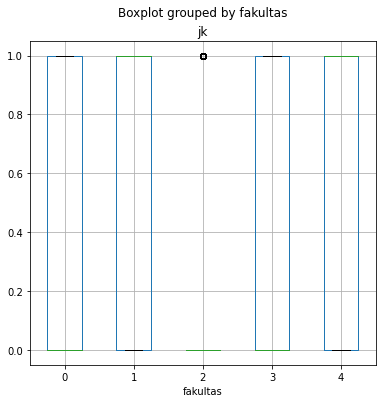

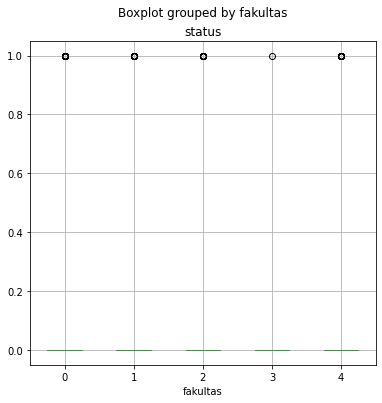

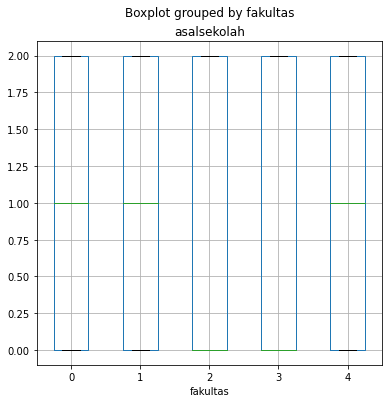

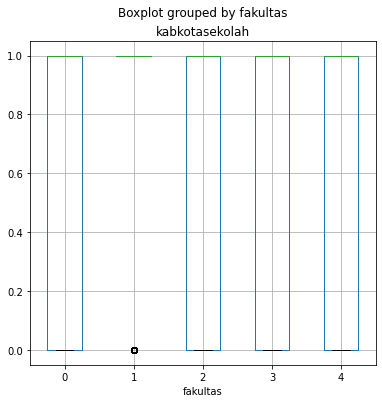

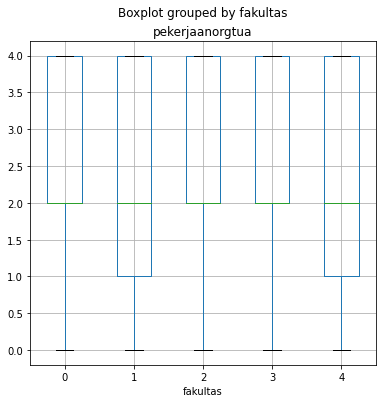

In [21]:
for col in features:
    df1.boxplot(column=col, by="fakultas", figsize=(6,6))
    plt.title(col)
plt.show()

In [22]:
# persiapan data
# Pemisahan features and labels
dat_X, dat_y = df1[features].values, df1["fakultas"].values

# Split data 85%-15% menjadi training set dan test set
x_dat_train, x_dat_test, y_dat_train, y_dat_test = train_test_split(dat_X, dat_y, test_size=0.15, random_state=0, stratify=dat_y)

print('Training Set: %d, Test Set: %d \n' % (x_dat_train.size, x_dat_test.size))

Training Set: 27480, Test Set: 4855 



In [23]:
# membuat model Logistic Regression
# penalty : l1, l2, elasticnet
# solver : newton-cg, lbfgs, liblinear, sag, saga
# max_iter : 1000, 2000, 5000, 10000
# multi_class : auto, ovr, multinomial
LR = LogisticRegression(penalty="l2", solver="lbfgs", max_iter=1000, multi_class="auto")
LR.fit(x_dat_train,y_dat_train)
yhat = LR.predict(x_dat_test)
print(accuracy_score(y_dat_test,yhat))

0.486096807415036


In [24]:
# lihat klasifikasi report
print(classification_report(y_dat_test, yhat))

              precision    recall  f1-score   support

           0       0.53      0.84      0.65       472
           1       0.33      0.37      0.35       198
           2       0.00      0.00      0.00        63
           3       0.00      0.00      0.00        28
           4       0.67      0.01      0.02       210

    accuracy                           0.49       971
   macro avg       0.31      0.24      0.20       971
weighted avg       0.47      0.49      0.39       971



c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


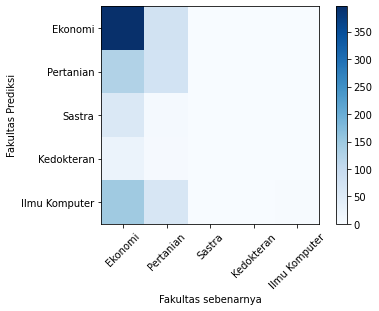

In [25]:
# ukur confusion matrix
mcm = confusion_matrix(y_dat_test, yhat)
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(class_fakultas))
plt.xticks(tick_marks, class_fakultas, rotation=45)
plt.yticks(tick_marks, class_fakultas)
plt.xlabel("Fakultas sebenarnya")
plt.ylabel("Fakultas Prediksi")
plt.show()

In [26]:
# membuat model Naive Bayes
NB = GaussianNB()
NB.fit(x_dat_train,y_dat_train)
yhat = NB.predict(x_dat_test)
print(accuracy_score(y_dat_test,yhat))

0.48094747682801237


In [27]:
# lihat klasifikasi report
print(classification_report(y_dat_test, yhat))

              precision    recall  f1-score   support

           0       0.56      0.77      0.64       472
           1       0.33      0.52      0.40       198
           2       0.22      0.03      0.06        63
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00       210

    accuracy                           0.48       971
   macro avg       0.22      0.26      0.22       971
weighted avg       0.35      0.48      0.40       971



c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


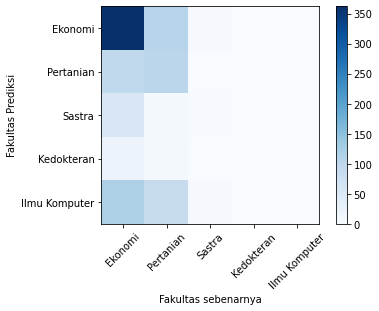

In [28]:
# ukur confusion matrix
mcm = confusion_matrix(y_dat_test, yhat)
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(class_fakultas))
plt.xticks(tick_marks, class_fakultas, rotation=45)
plt.yticks(tick_marks, class_fakultas)
plt.xlabel("Fakultas sebenarnya")
plt.ylabel("Fakultas Prediksi")
plt.show()